## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 3 #

### esercizio 3.1

In questo esercizio abbiamo simulato i prezzi di una call-option e di una put-option europee, e cofrontato i risultati con quelli analitici dati dalla teoria di Black-Scholes.

La teoria di Black-Scholes assume che l'evoluzione temporale di un prezzo di un bene sia stocastica e segua un moto Browniano geometrico (GBM) con costanti le seguenti quantità: tasso di interessa risk-free e volatilità.

Definendo $S$ il prezzo di un bene, l''evoluzione di questo seguirà un moto Browniano geomentrico $S\sim GBM(\mu,\sigma^2)$, con valore iniziale $S(0)$ Al tempo $t$ $S$ è:
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    con $W(t)\sim\mathcal{N}(0,t)$.
    
Poichè gli incrementi di $W$ sono indipendenti e distribuiti normalmente, si può usare una formula ricorsiva per la stima di $S(t)$, dato $S(t_i)$:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    con $Z_i \sim \mathcal{N}(0,1)$
    
Dato $S(0)$, è possibile stimare $S(T)$ in entrambi i modi enunciati precedentemente. Per l'ultimo l'intervallo $[0,T]$ è stato suddiviso in $N$ sottointervalli.

Per trovare i valori della Call- e della Put- option si utilizzano le seguenti formule, dove le parentesi $(...)^{+}$ indicano il massimo dell'argomento:
$C[S(0),0]=e^{-rT} \big < (S(T) - K)^{+} \big >$

$P[S(0),0]=e^{-rT} \big < (K-S(T)^{+} \big >$

Per la stima di $C$ e $P$ abbiamo operato il metodo del data blockng, simulando un GBM $10^4$ volte e ogni volta stimando $C$ e $P$ suddividendo le stime im $100$ blocchi.

I parametri utilizzati nelle simulazioni sono:
- prezzo dell'asset a $t=0$: $S(0)=100$
- tempo di consegna: $T=1$
- prezzo pattuito: $K=100$
- tasso di interesse risk-free: $r=0.1$
- volatilità: $\sigma=0.25$

I risultati attesi sono:

- call:  $14.975790778311286$
- put:  $5.4595325819072364$

Di seguito sono riportati  i risultati ottenuti, i primi due corrispondono alle grandezze stimate con il metodo Diretto, le seguenti due con il metodo Discretizzato.

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


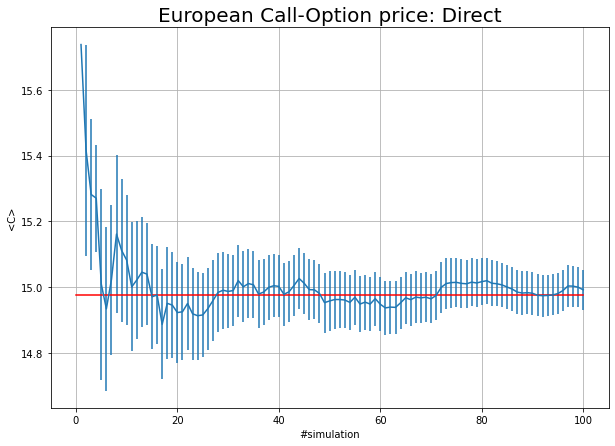

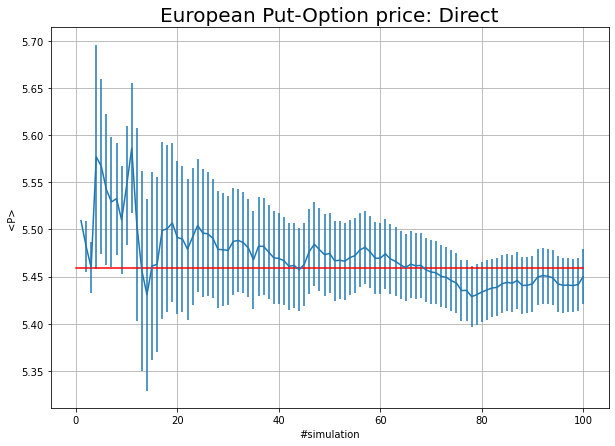

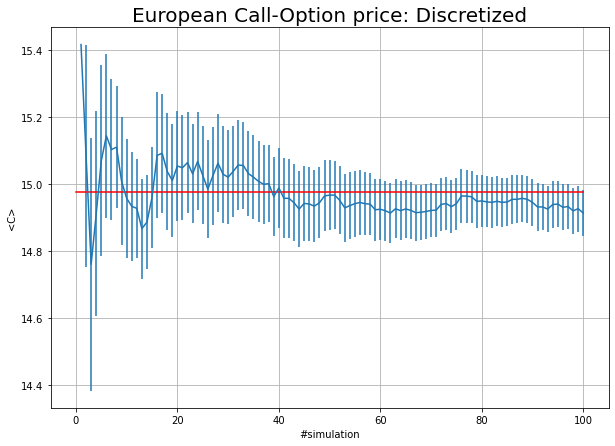

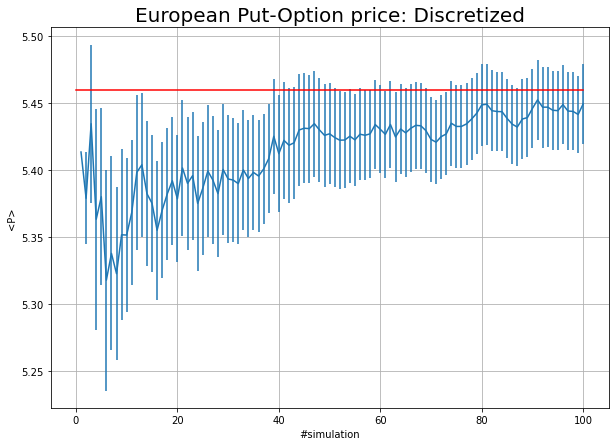

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

x, f, error = np.loadtxt("output1C.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,error)
plt.title('European Call-Option price: Direct',fontsize = 20)
plt.xlabel('#simulation')
plt.ylabel('<C>')
plt.grid(True)
plt.plot([0,100],[call,call], color="red")
plt.show()

x, f, error = np.loadtxt("output1P.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,error)
plt.title('European Put-Option price: Direct',fontsize = 20)
plt.xlabel('#simulation')
plt.ylabel('<P>')
plt.grid(True)
plt.plot([0,100],[put,put], color="red")
plt.show()

x, f, error = np.loadtxt("output2C.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,error)
plt.title('European Call-Option price: Discretized',fontsize = 20)
plt.xlabel('#simulation')
plt.ylabel('<C>')
plt.grid(True)
plt.plot([0,100],[call,call], color="red")
plt.show()
x, f, error = np.loadtxt("output2P.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,error)
plt.title('European Put-Option price: Discretized',fontsize = 20)
plt.xlabel('#simulation')
plt.ylabel('<P>')
plt.grid(True)
plt.plot([0,100],[put,put], color="red")
plt.show()

Si può notare come in tutti i grafici i valori ottenuti siano compatibili con quelli attesi, riportati sopra il primo grafico e rappresentati in rosso in ognuno dei grafici